In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import random
from sklearn import tree
import json
import time
import pickle

In [2]:
datapath = "ACQUIRING_DATA/PatientData_TRAIN_ML.csv"

In [3]:
#Loading the dataset
df  = pd.read_csv(datapath,sep="\t")
X= df.drop(["ID","removal"],1) #Drop the ID and the removal value (redundant)
AVG_CHOL = X["2093-3"].mean()
int(AVG_CHOL)

HighChol_array = []
for index,row in X.iterrows():
    if int(row["2093-3"]) > int(AVG_CHOL):
        HighChol_array.append(1) 
    else:
        HighChol_array.append(0) 
X["HighCholesterol"] = HighChol_array
X=X.drop(["2093-3"],1) #Drop the cholesterol value from the array.

In [4]:
#Only use the first 200 rows for a rounder number
X=X.head(200)

In the forums, it was mentioned that we were not allowed to use the features:
* Triglycerides - 2571-8
* Low Density Lipoprotein Cholesterol - 18262-6
* High Density Lipoprotein Cholesterol - 2085-9

In [5]:
#Drop the aforementioned illegal features
X= X.drop(["2571-8","18262-6","2085-9"],1) 


In [6]:
y= X["HighCholesterol"]

In [7]:
#Drop High cholesterol from the input
X= X.drop("HighCholesterol",1) 
X

,32207-3,777-3,21000-5,786-4,32623-1,39156-5,29463-7,72514-3,8302-2,8462-4,...,785-6,787-2,AI,AS,AA,NH,W,OR,age,gender
0,369.11,258.20,43.761,35.920,10.1690,30.02,93.1,2.0,176.1,78.0,...,32.296,87.638,0,0,0,0,1,0,45,1
1,489.98,286.86,45.413,34.484,10.7340,27.46,84.1,4.0,175.0,86.0,...,30.363,83.495,0,0,0,0,1,0,46,1
2,334.79,192.41,45.611,33.372,10.9640,27.43,74.8,2.0,165.1,72.0,...,31.862,80.002,0,0,0,0,1,0,36,0
3,167.98,318.85,39.654,35.616,11.3040,26.64,79.2,3.0,172.4,79.0,...,31.170,88.973,0,0,0,0,1,0,36,0
4,502.83,442.51,42.608,35.660,11.1270,27.79,71.8,4.0,156.3,82.0,...,30.477,88.215,0,0,1,0,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,216.72,156.52,41.644,33.917,11.2700,30.27,92.9,2.0,175.2,77.0,...,28.803,87.820,0,0,0,0,1,0,50,1
196,489.98,384.34,39.668,35.781,12.0750,22.04,74.0,3.0,183.2,71.0,...,30.136,94.555,0,0,0,0,1,0,78,0
197,451.12,448.26,40.836,33.590,9.9021,29.47,75.7,4.0,160.3,78.0,...,32.457,83.618,0,0,0,0,1,0,64,0
198,356.02,259.88,43.507,35.079,11.4030,27.86,76.5,2.0,165.7,86.0,...,27.960,90.002,0,0,0,0,1,0,36,0


In [8]:
def trainModel():
  #Time how long this takes
  start_time = time.time()

  MAX_ACCURACY = 0.1
  final_codes = []
  combinationsTested = 0 
  while MAX_ACCURACY<0.80: #Only stop the loop once the accuracy is over the 80%
    chosen_codes = set()
    codes = list(X.columns.values)
    while len(chosen_codes)<5:
      index = random.randint(0, len(codes)-1)
      chosen_codes.add(codes[index])
    coloums = list(chosen_codes)
    combinationsTested=combinationsTested+1
    #Print out every 100,000 combinations
    if combinationsTested%100000 == 0:
        print("\nNumber of Combinations Tested: "+str(combinationsTested))
        print("The max accuracy as of now is: "+str(MAX_ACCURACY))
    Z = X[coloums]
    #Split the data 
    X_train, X_test, y_train, y_test = train_test_split(Z, y, random_state=1)
    #Fit the decision tree model
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    #Predict the value
    y_pred = dt.predict(X_test)
    #See the accuracy
    if accuracy_score(list(y_test), y_pred)>MAX_ACCURACY:
      chosen_dt = dt
      MAX_ACCURACY=accuracy_score(list(y_test), y_pred)
      final_codes = chosen_codes
  #Print how many combinations that were tested 
  print("Combinations Tested: "+ str(combinationsTested))

  #Print the time that it has taken to find these features
  print("Taken--- %s seconds ---" % (time.time() - start_time))

  #We then return the model and codes that has achieved an accuaracy of above 80%
  return dt , chosen_codes


# Proof of Accuracy of 80% or Higher


In [9]:
#Run Machine Learning model 
model , final_codes  = trainModel()

Combinations Tested: 52647
Taken--- 239.9828805923462 seconds ---


In [10]:
coloums = list(final_codes)
Z = X[coloums]
X_train, X_test, y_train, y_test = train_test_split(Z, y, random_state=1)
#Predict the value
y_pred = model.predict(X_test)

#Find the Accuracy score 
score = accuracy_score(list(y_test), y_pred)
print("Out of " + str(len(y_test)) + " patients used to test the model, it correctly predicted "+ str(len(y_test)*score))
score = score*100 #Multiply it by 100 to get percentage
print("The percentage accuracy of this model is " + str(score)+"%")


Out of 50 patients used to test the model, it correctly predicted 40.0
The percentage accuracy of this model is 80.0%


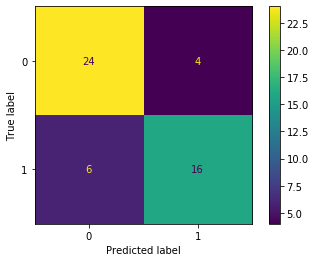

In [11]:
print(plot_confusion_matrix(model,X_test,y_test))

# Selected Features



In [12]:
#Print the selected codes
print(final_codes)

{'39156-5', '6690-2', 'NH', '786-4', '789-8'}


These codes map to the features of:
* '39156-5' : Body Mass Index.
* '6690-2' : Leukocytes in Blood by Automated count.
* 'NH' : Native Hawaiian or Other Pacific Islander.
* '786-4' : MCHC by Automated count.
* '789-8' : Erythrocytes in Blood by Automated count.

In [13]:
#Save the model 
# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

#Save the selected features
with open("final_feature_codes.json", "w" ) as file:
    json.dump(list(final_codes),file)